In [33]:
# Initial imports
import pandas as pd
!pip install scikit-learn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [34]:
#Bringing in the dataset
avo_dataset = pd.read_csv("./avocado 2.csv")

avo_dataset.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [35]:
type(avo_dataset)

pandas.core.frame.DataFrame

In [36]:
#Need to create a Total Singles column, which is Total Volume minus Total Bags
avo_dataset["Total Singles"] = avo_dataset["Total Volume"] - avo_dataset["Total Bags"]

avo_dataset["Date"] = pd.to_datetime(avo_dataset["Date"])

def assign_season(month):
    if month in [1, 2, 12]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

avo_dataset["Season"] = avo_dataset["Date"].dt.month.apply(assign_season)


avo_dataset.head()





#avo_dataset = all data, no groupings 


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Total Singles,Season
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,55539.75,Winter
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,45371.42,Winter
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,110074.87,Winter
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,73180.99,Winter
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,44855.65,Fall


In [37]:
avo_dataset.info

<bound method DataFrame.info of        Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

       

In [38]:
#creating new consolidated dataset that is only regions and only large categories

avo_data_consol = avo_dataset.drop(columns=["Small Bags", "Large Bags", "XLarge Bags", "4770", "4046", "4225"])

avo_data_consol["AveragePrice"] = avo_data_consol["AveragePrice"].astype(float)

avo_data_consol["Total Bags"] = avo_data_consol["Total Bags"].astype(int)

avo_data_consol["Total Singles"] = avo_data_consol["Total Singles"].astype(int)

avo_data_consol["Total Volume"] = avo_data_consol["Total Volume"].astype(int)

avo_data_consol["Month Week"] = pd.to_datetime(avo_data_consol["Date"]).dt.strftime('%m/%d')

column_order = ["Date", "year", "Month Week", "region", "AveragePrice", "Total Volume", "Total Singles", "Total Bags", "type"]
avo_data_consol = avo_data_consol[column_order]

regions_to_remove = [
    "California", "GreatLakes", "Midsouth", "Northeast",
    "Plains", "SouthCentral", "Southeast", "West", "TotalUS"
]

avo_data_consol = avo_data_consol[~avo_data_consol["region"].isin(regions_to_remove)]

if "Unnamed: 0" in avo_data_consol.columns:
    avo_data_consol = avo_data_consol.drop(columns=["Unnamed: 0"])

avo_data_consol.set_index("Date", inplace=True)


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_consol.to_csv("avo_data_consol.csv", index=False)


avo_data_consol.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  Total Volume  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33         64236   
2015-12-20  2015      12/20            Albany          1.35         54876   
2015-12-13  2015      12/13            Albany          0.93        118220   
2015-12-06  2015      12/06            Albany          1.08         78992   
2015-11-29  2015      11/29            Albany          1.28         51039   
...          ...        ...               ...           ...           ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63         17074   
2018-01-28  2018      01/28  WestTexNewMexico          1.71         13888   
2018-01-21  2018      01/21  WestTexNewMexico          1.87         13766   
2018-01-14  2018      01/14  WestTexNewMexico          1.93         16205   
2018-01-07  2018      01/07  WestTexNewMexico 

In [39]:
pivot_table = avo_data_consol.pivot_table(
    values=["Total Volume", "Total Singles", "Total Bags"],
    index="year",
    aggfunc="sum"
)
print(pivot_table)



      Total Bags  Total Singles  Total Volume
year                                         
2015   191091031      879862626    1070955880
2016   374860893      807706109    1182569285
2017   410957429      793956606    1204916283
2018   119057527      216415245     335473304


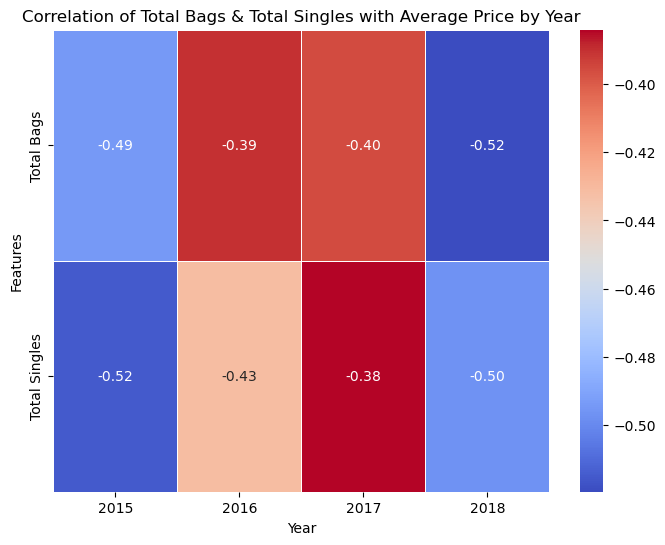

In [40]:
#correlation heatmap

correlation_matrices = avo_data_consol.groupby("year")[["Total Bags", "Total Singles", "AveragePrice"]].corr()

correlation_filtered = correlation_matrices.xs("AveragePrice", level=1, axis=0)[["Total Bags", "Total Singles"]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_filtered.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of Total Bags & Total Singles with Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Features")

plt.show()

In [41]:
file_path = "avocado 2.csv"  
avo_data_variants = pd.read_csv(file_path)

print(avo_data_variants.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [42]:
#creating a new dataset that is only variants and no totals

#creating new consolidated dataset that is only regions and only large categories


avo_data_variants = avo_dataset.drop(columns=["Total Volume", "Total Bags"])

avo_data_variants["AveragePrice"] = avo_data_variants["AveragePrice"].astype(float)

avo_data_variants["Small Bags"] = avo_data_variants["Small Bags"].astype(int)

avo_data_variants["Large Bags"] = avo_data_variants["Large Bags"].astype(int)

avo_data_variants["XLarge Bags"] = avo_data_variants["XLarge Bags"].astype(int)

avo_data_variants["4046"] = avo_data_variants["4046"].astype(int)


avo_data_variants["4225"] = avo_data_variants["4225"].astype(int)

avo_data_variants["4770"] = avo_data_variants["4770"].astype(int)






avo_data_variants["Month Week"] = pd.to_datetime(avo_data_variants["Date"]).dt.strftime('%m/%d')

column_order = ["Date", "year", "Month Week", "region", "AveragePrice", "4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags", "type", "Season"]
avo_data_variants = avo_data_variants[column_order]

regions_to_remove = [
    "California", "GreatLakes", "Midsouth", "Northeast",
    "Plains", "SouthCentral", "Southeast", "West", "TotalUS"
]

avo_data_variants["Date"] = pd.to_datetime(avo_data_variants["Date"])

def assign_season(month):
    if month in [1, 2, 12]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

avo_data_variants["Season"] = avo_data_variants["Date"].dt.month.apply(assign_season)

avo_data_variants = avo_data_variants[~avo_data_variants["region"].isin(regions_to_remove)]

if "Unnamed: 0" in avo_data_variants.columns:
    avo_data_variants = avo_data_variants.drop(columns=["Unnamed: 0"])

avo_data_variants.set_index("Date", inplace=True)




avo_data_variants.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  4046    4225  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33  1036   54454   
2015-12-20  2015      12/20            Albany          1.35   674   44638   
2015-12-13  2015      12/13            Albany          0.93   794  109149   
2015-12-06  2015      12/06            Albany          1.08  1132   71976   
2015-11-29  2015      11/29            Albany          1.28   941   43838   
...          ...        ...               ...           ...   ...     ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63  2046    1529   
2018-01-28  2018      01/28  WestTexNewMexico          1.71  1191    3431   
2018-01-21  2018      01/21  WestTexNewMexico          1.87  1191    2452   
2018-01-14  2018      01/14  WestTexNewMexico          1.93  1527    2981   
2018-01-07  2018      01/07  WestTexNewMexico 

In [43]:


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_variants.to_csv("avo_data_variants.csv", index=False)

In [44]:
avo_data_variants.head

<bound method NDFrame.head of             year Month Week            region  AveragePrice  4046    4225  \
Date                                                                        
2015-12-27  2015      12/27            Albany          1.33  1036   54454   
2015-12-20  2015      12/20            Albany          1.35   674   44638   
2015-12-13  2015      12/13            Albany          0.93   794  109149   
2015-12-06  2015      12/06            Albany          1.08  1132   71976   
2015-11-29  2015      11/29            Albany          1.28   941   43838   
...          ...        ...               ...           ...   ...     ...   
2018-02-04  2018      02/04  WestTexNewMexico          1.63  2046    1529   
2018-01-28  2018      01/28  WestTexNewMexico          1.71  1191    3431   
2018-01-21  2018      01/21  WestTexNewMexico          1.87  1191    2452   
2018-01-14  2018      01/14  WestTexNewMexico          1.93  1527    2981   
2018-01-07  2018      01/07  WestTexNewMexico 

In [45]:
#further combining the data because 4046 and Small Bags = total small avos, 4225 + Large Bags = total large avos, 4770 + XL Bags = total xl avos based on the
#Avocado Grower's site


avo_dataset["Total Small Avocados"] = avo_dataset["4046"] + avo_dataset["Small Bags"]
avo_dataset["Total Large Avocados"] = avo_dataset["4225"] + avo_dataset["Large Bags"]
avo_dataset["Total XLarge Avocados"] = avo_dataset["4770"] + avo_dataset["XLarge Bags"]

avo_data_variants["Total Small Avocados"] = avo_data_variants["4046"] + avo_data_variants["Small Bags"]
avo_data_variants["Total Large Avocados"] = avo_data_variants["4225"] + avo_data_variants["Large Bags"]
avo_data_variants["Total XLarge Avocados"] = avo_data_variants["4770"] + avo_data_variants["XLarge Bags"]



avo_sales_by_year_type = avo_data_variants.groupby(["Date", "year", "type"])[
    ["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "Season"]
].sum().reset_index()


avo_dataset.to_csv("avo_dataset.csv", index=False)

avo_data_variants.to_csv("avo_data_variants.csv", index=False)

avo_data_variants.head(
    
)



,year,Month Week,region,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados
Date,,,,,,,,,,,,,,,
2015-12-27,2015,12/27,Albany,1.33,1036,54454,48,8603,93,0,conventional,Winter,9639,54547,48
2015-12-20,2015,12/20,Albany,1.35,674,44638,58,9408,97,0,conventional,Winter,10082,44735,58
2015-12-13,2015,12/13,Albany,0.93,794,109149,130,8042,103,0,conventional,Winter,8836,109252,130
2015-12-06,2015,12/06,Albany,1.08,1132,71976,72,5677,133,0,conventional,Winter,6809,72109,72
2015-11-29,2015,11/29,Albany,1.28,941,43838,75,5986,197,0,conventional,Fall,6927,44035,75


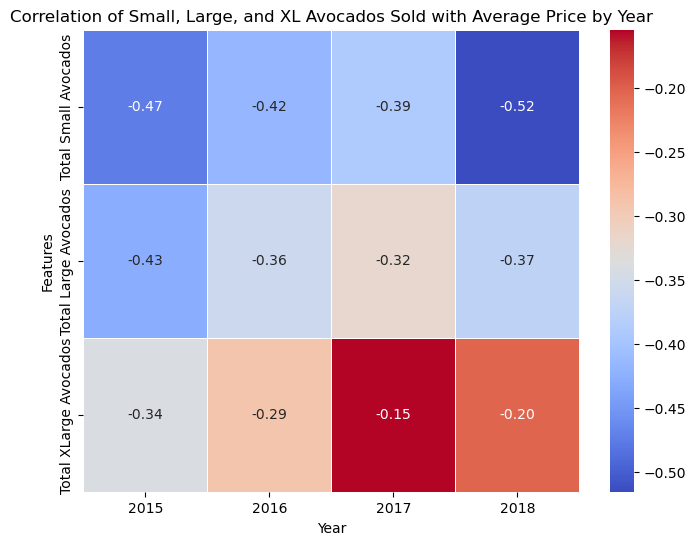

In [46]:
#checking out the new consolidations

avo_data_variants_graph = avo_data_variants[["year", "Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "AveragePrice"]]


correlation_matrices = avo_data_variants_graph.groupby("year")[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados", "AveragePrice"]].corr()

correlation_filtered = correlation_matrices.xs("AveragePrice", level=1, axis=0)[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]]

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_filtered.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation of Small, Large, and XL Avocados Sold with Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Features")

plt.show()




In [47]:
print(avo_data_variants.columns)


Index(['year', 'Month Week', 'region', 'AveragePrice', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'Season',
       'Total Small Avocados', 'Total Large Avocados',
       'Total XLarge Avocados'],
      dtype='object')


In [48]:
summary_statistics = avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].describe().T

print(summary_statistics)



                         count           mean            std  min     25%  \
Total Small Avocados   15207.0  136448.491287  293453.931875  0.0  3318.5   
Total Large Avocados   15207.0  105259.825344  182160.970488  0.0  3114.5   
Total XLarge Avocados  15207.0    7774.305912   22014.904636  0.0     0.0   

                           50%       75%        max  
Total Small Avocados   23319.0  158028.5  4398237.0  
Total Large Avocados   25696.0  124031.5  2342560.0  
Total XLarge Avocados    143.0    4953.0   287275.0  


In [49]:
totals = avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]].sum()

print(totals)



Total Small Avocados     2074972207
Total Large Avocados     1600686164
Total XLarge Avocados     118223870
dtype: int64


In [50]:
zero_counts = (avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]] == 0).sum()
print(zero_counts)

Total Small Avocados        1
Total Large Avocados       21
Total XLarge Avocados    5141
dtype: int64


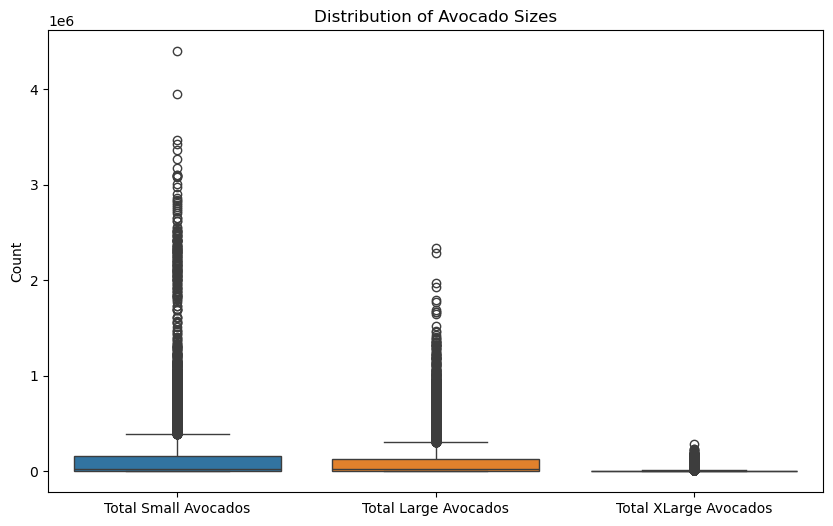

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=avo_data_variants[["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]])
plt.title("Distribution of Avocado Sizes")
plt.ylabel("Count")
plt.show()

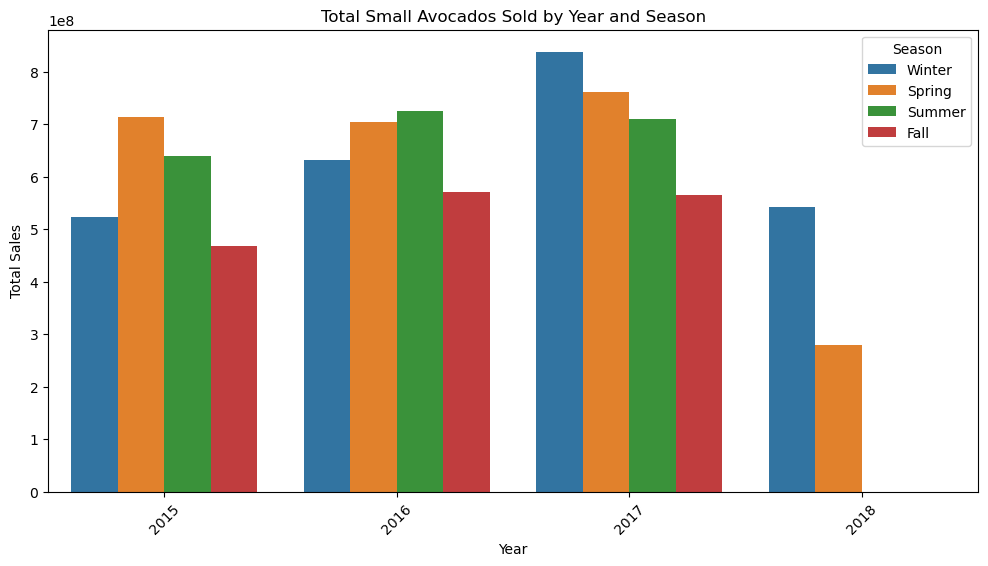

In [52]:
seasonal_sales = avo_dataset.groupby(["year", "Season"])[
    ["Total Small Avocados", "Total Large Avocados", "Total XLarge Avocados"]
].sum().reset_index()

season_order = ["Winter", "Spring", "Summer", "Fall"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="year", 
    y="Total Small Avocados", 
    hue="Season", 
    hue_order=season_order, 
    data=seasonal_sales
)
plt.title("Total Small Avocados Sold by Year and Season")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()

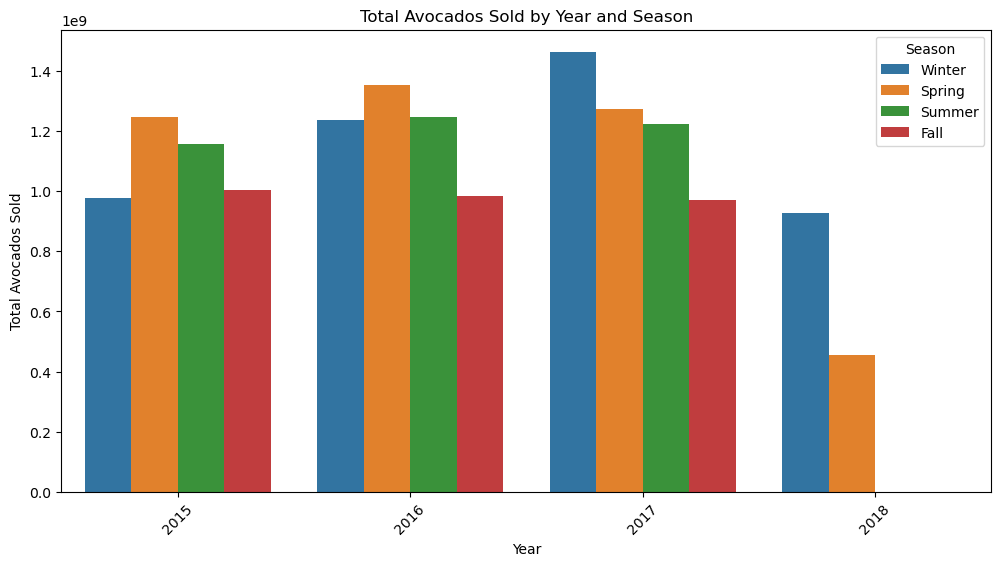

In [53]:
seasonal_comparison = avo_dataset.groupby(["year", "Season"])[
    ["Total Volume", "Total Small Avocados", "Total Large Avocados"]
].sum().reset_index()

season_order = ["Winter", "Spring", "Summer", "Fall"]

plt.figure(figsize=(12, 6))
sns.barplot(
    x="year", 
    y="Total Volume", 
    hue="Season", 
    hue_order=season_order, 
    data=seasonal_comparison
)

plt.title("Total Avocados Sold by Year and Season")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.show()





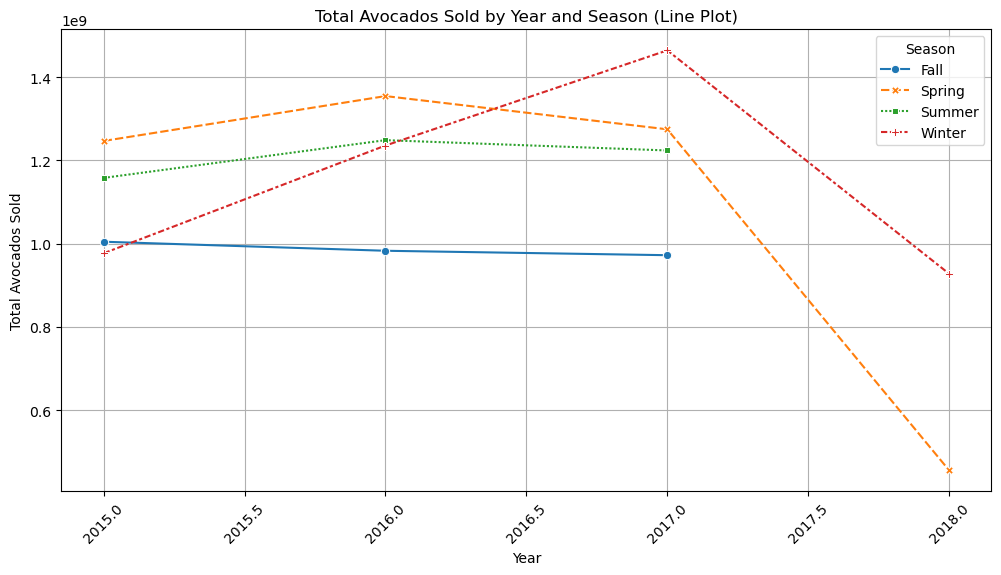

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="year", 
    y="Total Volume", 
    hue="Season", 
    style="Season", 
    markers=True, 
    data=seasonal_comparison
)
plt.title("Total Avocados Sold by Year and Season (Line Plot)")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Season")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



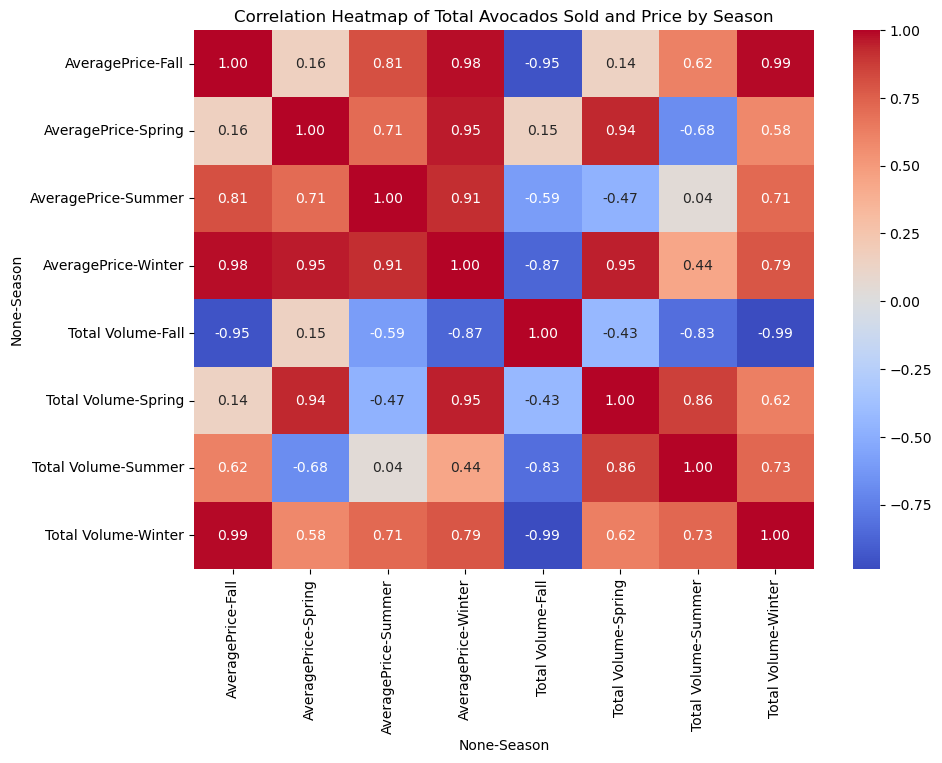

In [55]:
season_price_pivot = avo_dataset.pivot_table(
    values=["Total Volume", "AveragePrice"],
    index="year",
    columns="Season",
    aggfunc="sum"
)
season_price_correlation = season_price_pivot.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(season_price_correlation, annot=True, cmap="coolwarm", fmt=".2f")


plt.title("Correlation Heatmap of Total Avocados Sold and Price by Season")
plt.show()

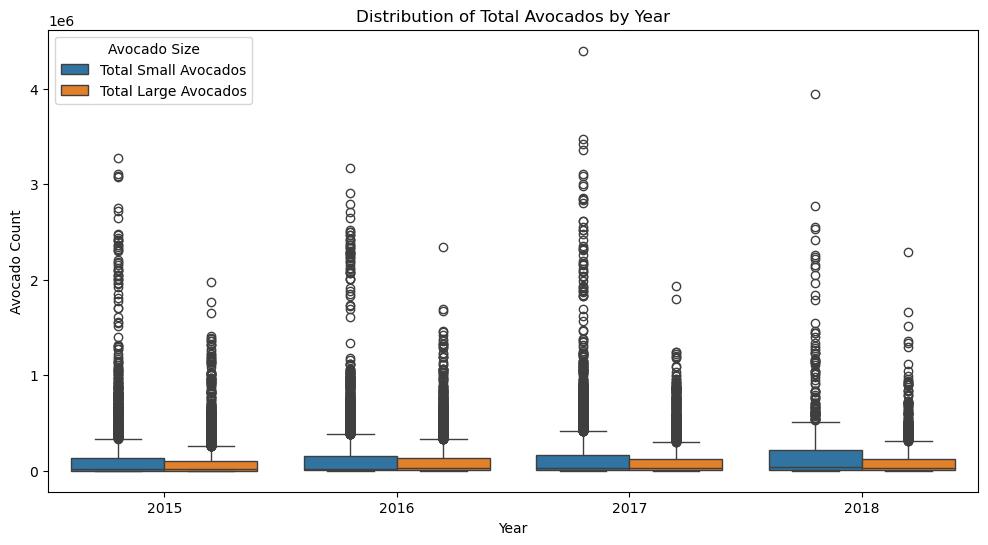

In [56]:
plt.figure(figsize=(12, 6))


avo_melted = avo_data_variants.melt(id_vars=["year"], value_vars=["Total Small Avocados", "Total Large Avocados"], 
                              var_name="Avocado Size", value_name="Count")

sns.boxplot(x="year", y="Count", hue="Avocado Size", data=avo_melted)
plt.title("Distribution of Total Avocados by Year")
plt.ylabel("Avocado Count")
plt.xlabel("Year")
plt.legend(title="Avocado Size")
plt.show()

<Figure size 1200x600 with 0 Axes>

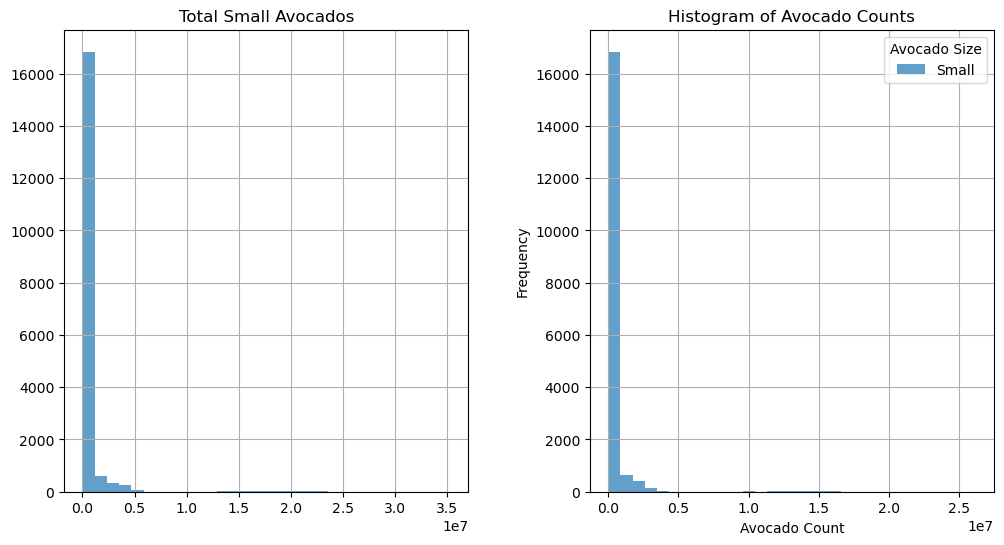

In [57]:
plt.figure(figsize=(12, 6))

avo_dataset[["Total Small Avocados", "Total Large Avocados"]].hist(bins=30, alpha=0.7, figsize=(12,6), label=["Small", "Large"])

plt.title("Histogram of Avocado Counts")
plt.xlabel("Avocado Count")
plt.ylabel("Frequency")
plt.legend(title="Avocado Size")
plt.show()

<Figure size 1200x600 with 0 Axes>

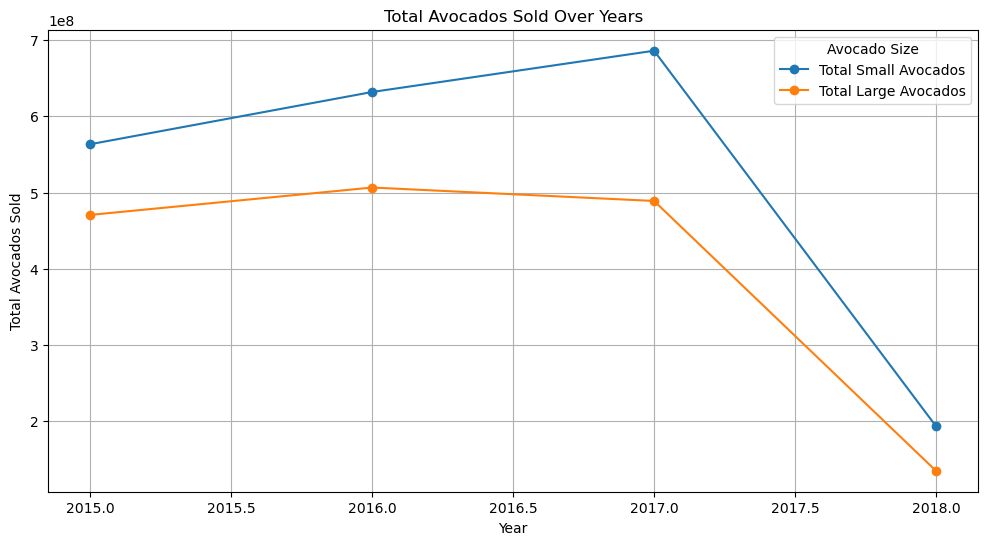

In [58]:
plt.figure(figsize=(12, 6))

yearly_totals = avo_data_variants.groupby("year")[["Total Small Avocados", "Total Large Avocados"]].sum()


yearly_totals.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Total Avocados Sold Over Years")
plt.ylabel("Total Avocados Sold")
plt.xlabel("Year")
plt.legend(title="Avocado Size")
plt.grid()
plt.show()



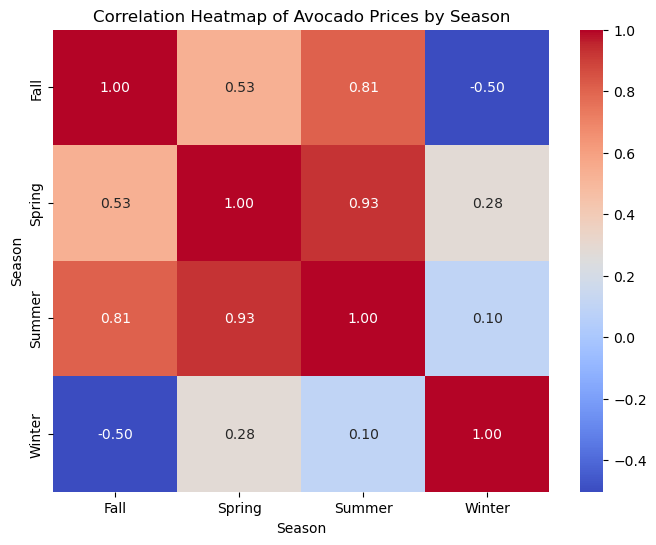

In [59]:
price_pivot = avo_dataset.pivot_table(
    values="AveragePrice", 
    index="year", 
    columns="Season", 
    aggfunc="mean"
)

correlation_matrix = price_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")


plt.title("Correlation Heatmap of Avocado Prices by Season")
plt.show()


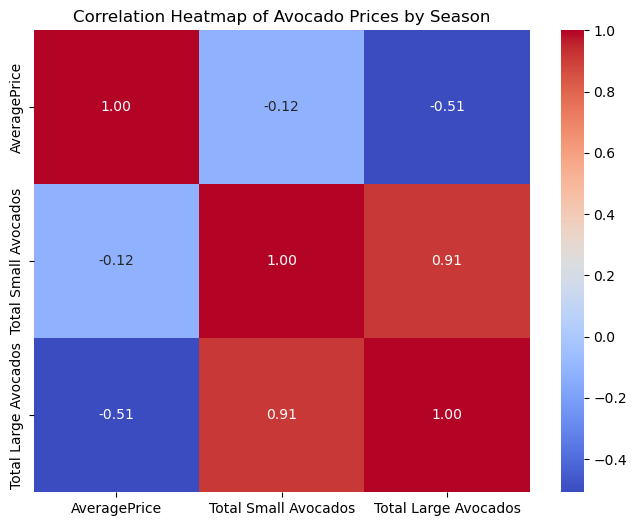

In [60]:

price_pivot = avo_dataset.groupby("year")[
    ["AveragePrice", "Total Small Avocados", "Total Large Avocados"]
].mean()

correlation_matrix = price_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Avocado Prices by Season")
plt.show()


In [61]:
# setting things up for handling n/a values

avo_dataset_ml= pd.get_dummies(avo_dataset, columns=["type"], drop_first=True)

avo_data_variants_ml = pd.get_dummies(avo_data_variants, columns=["type"], drop_first=True)



avo_dataset_ml.to_csv("avo_dataset_ml.csv", index=False)

avo_data_variants_ml.to_csv("avo_data_variants_ml.csv", index=False)


In [62]:
#decided to limit our analysis to small and large avos to simplify findings
# would have had to remove ~30% of the overall dataset due to high number of zero values in XLarge variant.  
#if time allows, we will go back and imput to solve for xLarge and run our overall analysis again.


In [63]:
avo_dataset_ml.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,2015,Albany,49295.87,Fall,7740.74,48195.43,43.61,False
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,2015,Albany,75134.90,Fall,9565.73,73794.77,93.26,False
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,2015,Albany,102599.11,Fall,6970.60,102377.73,80.00,False
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,2015,Albany,88423.06,Fall,12126.68,87599.40,85.34,False
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,2015,Albany,65712.84,Fall,8903.87,65321.89,113.00,False


In [64]:
avo_dataset_ml= avo_dataset_ml.drop(columns=["4770", "XLarge Bags"])

avo_dataset_ml.head(12)



,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,6683.91,6556.47,127.44,2015,Albany,49295.87,Fall,7740.74,48195.43,43.61,False
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,8318.86,8196.81,122.05,2015,Albany,75134.90,Fall,9565.73,73794.77,93.26,False
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,6829.22,6266.85,562.37,2015,Albany,102599.11,Fall,6970.60,102377.73,80.00,False
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,11388.36,11104.53,283.83,2015,Albany,88423.06,Fall,12126.68,87599.40,85.34,False
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,8625.92,8061.47,564.45,2015,Albany,65712.84,Fall,8903.87,65321.89,113.00,False


In [65]:
avo_dataset_ml.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,6683.91,6556.47,127.44,2015,Albany,49295.87,Fall,7740.74,48195.43,43.61,False
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,8318.86,8196.81,122.05,2015,Albany,75134.90,Fall,9565.73,73794.77,93.26,False
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,6829.22,6266.85,562.37,2015,Albany,102599.11,Fall,6970.60,102377.73,80.00,False
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,11388.36,11104.53,283.83,2015,Albany,88423.06,Fall,12126.68,87599.40,85.34,False
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,8625.92,8061.47,564.45,2015,Albany,65712.84,Fall,8903.87,65321.89,113.00,False


In [66]:
avo_dataset_ml = avo_dataset_ml.loc[(avo_dataset_ml["Total Small Avocados"] != 0) & (avo_dataset_ml["Total Large Avocados"] != 0)]


In [67]:
total_rows = avo_dataset_ml.shape[0]  
print(f"Total rows in the dataset: {total_rows}")

Total rows in the dataset: 18227


In [68]:
avo_dataset_ml.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False


In [69]:
if "Unnamed: 0" in avo_dataset_ml.columns:
    avo_dataset_ml = avo_dataset_ml.drop(columns=["Unnamed: 0"])

avo_dataset_ml.set_index("Date", inplace=True)



In [70]:
avo_dataset_ml.head()

,AveragePrice,Total Volume,4046,4225,Total Bags,Small Bags,Large Bags,year,region,Total Singles,Season,Total Small Avocados,Total Large Avocados,Total XLarge Avocados,type_organic
Date,,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,8696.87,8603.62,93.25,2015,Albany,55539.75,Winter,9640.36,54548.10,48.16,False
2015-12-20,1.35,54876.98,674.28,44638.81,9505.56,9408.07,97.49,2015,Albany,45371.42,Winter,10082.35,44736.30,58.33,False
2015-12-13,0.93,118220.22,794.70,109149.67,8145.35,8042.21,103.14,2015,Albany,110074.87,Winter,8836.91,109252.81,130.50,False
2015-12-06,1.08,78992.15,1132.00,71976.41,5811.16,5677.40,133.76,2015,Albany,73180.99,Winter,6809.40,72110.17,72.58,False
2015-11-29,1.28,51039.60,941.48,43838.39,6183.95,5986.26,197.69,2015,Albany,44855.65,Fall,6927.74,44036.08,75.78,False


Mean Squared Error: 170549560405.2831
R-squared Score: 0.9192


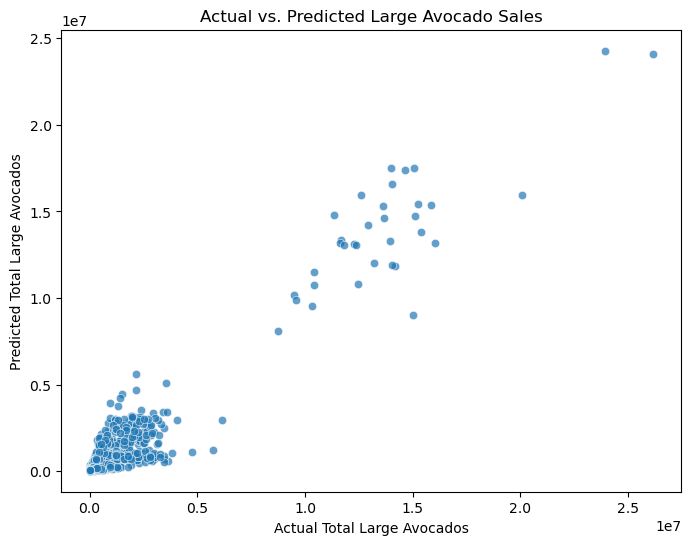

In [ ]:
#doing a regression analysis on avocado sizes

X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


Mean Squared Error: 276894562322.6763
R-squared Score: 0.8992


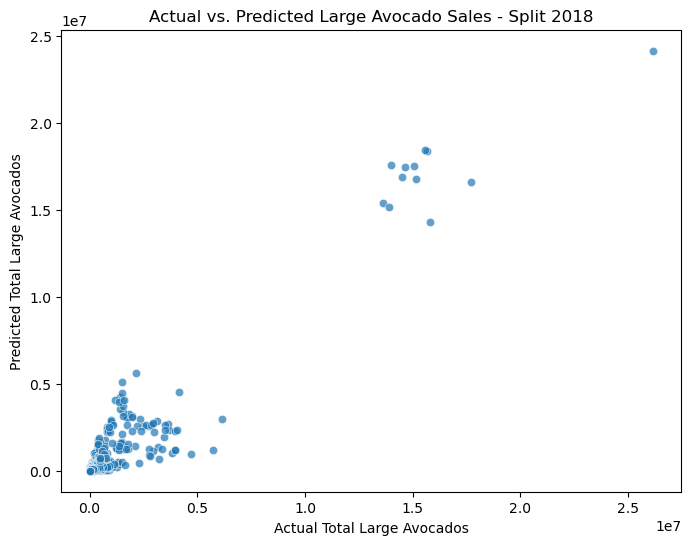

In [77]:
#doing a regression analysis on avocado sizes - trying with split test/train

X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

train_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2015, 2016, 2017])]
test_data = avo_dataset[avo_dataset["Date"].dt.year == 2018]

X_train = train_data[["Total Small Avocados"]]
y_train = train_data["Total Large Avocados"]
X_test = test_data[["Total Small Avocados"]]
y_test = test_data["Total Large Avocados"]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales - Split 2018")
plt.show()


Mean Squared Error: 241597325561.9456
R-squared Score: 0.8855


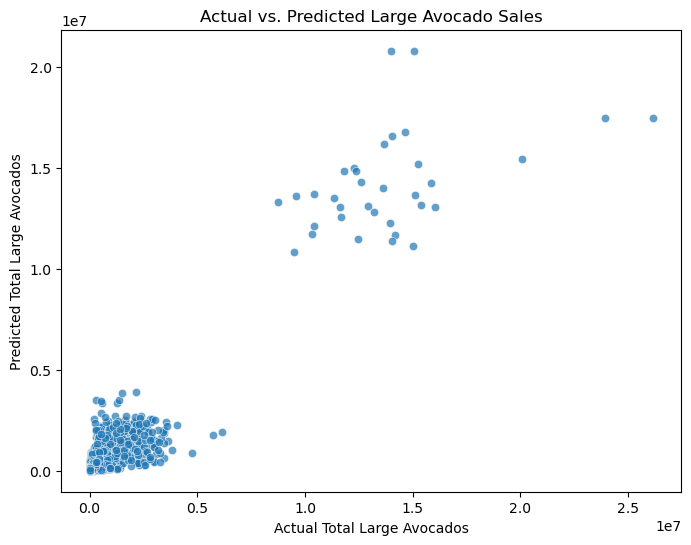

In [74]:
#doing a regression analysis on avocado sizes

from sklearn.ensemble import RandomForestRegressor


X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


Mean Squared Error: 350487682901.1068
R-squared Score: 0.8724


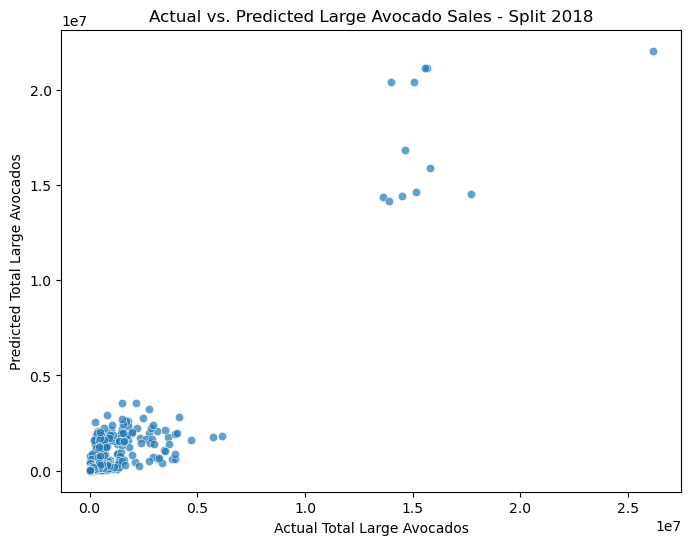

In [79]:
#doing a regression analysis on avocado sizes - split test and train

from sklearn.ensemble import RandomForestRegressor


train_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2015, 2016, 2017])]
test_data = avo_dataset[avo_dataset["Date"].dt.year == 2018]

X_train = train_data[["Total Small Avocados"]]
y_train = train_data["Total Large Avocados"]
X_test = test_data[["Total Small Avocados"]]
y_test = test_data["Total Large Avocados"]

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales - Split 2018")
plt.show()


Mean Squared Error: 326230291883.4870
R-squared Score: 0.8455


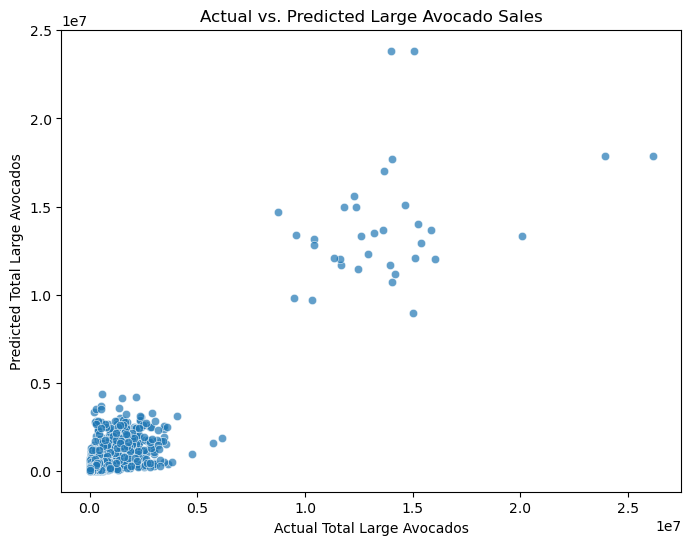

In [75]:
#doing a regression analysis on avocado sizes

from sklearn.tree import DecisionTreeRegressor


X = avo_dataset[["Total Small Avocados"]]  
y = avo_dataset["Total Large Avocados"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


Mean Squared Error: 351477936855.3479
R-squared Score: 0.8255


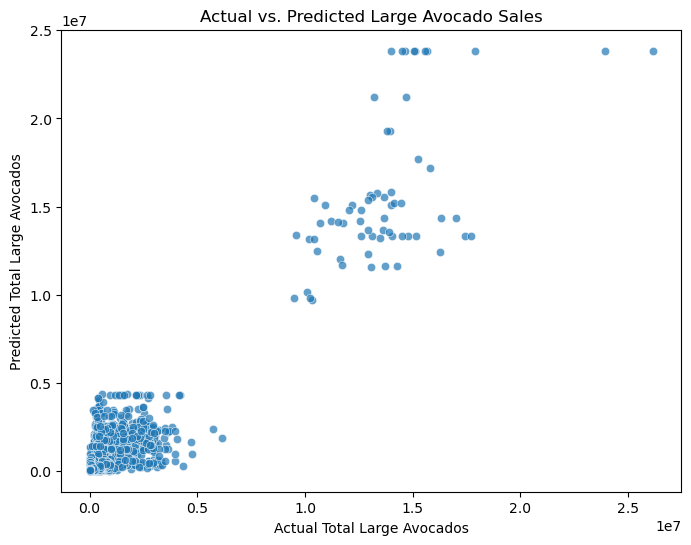

In [82]:
#doing a regression analysis on avocado sizes

from sklearn.tree import DecisionTreeRegressor


train_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2015, 2016])]
test_data = avo_dataset[avo_dataset["Date"].dt.year.isin([2017, 2018])]

X_train = train_data[["Total Small Avocados"]]
y_train = train_data["Total Large Avocados"]
X_test = test_data[["Total Small Avocados"]]
y_test = test_data["Total Large Avocados"]

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Total Large Avocados")
plt.ylabel("Predicted Total Large Avocados")
plt.title("Actual vs. Predicted Large Avocado Sales")
plt.show()


In [ ]:
# do a prediction on season
#figure out the story...
#figure out the presentation

# use distribution or scaling but not both at the same time


# do a distribution of prices on conventional and organic separately 
# predict org and conventional 